# First lab assigment WUM
Author: Maciej Teterycz - mt459557 - m.teterycz2@student.mimuw.edu.pl

In [26]:
# Import niezbędnych bibliotek
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.inspection import permutation_importance
import statsmodels.api as sm


### Task 1. Data Description


In [ ]:
!gdown https://raw.githubusercontent.com/mteterycz/University-Projects/refs/heads/main/Machine-Learning/First-Assignment/earnings.csv
filepath = 'earnings.csv'
df = pd.read_csv(filepath, sep=';')
display(df)

Downloading...
From: https://raw.githubusercontent.com/mteterycz/University-Projects/refs/heads/main/Machine-Learning/First-Assignment/earnings.csv
To: /Users/maciek/WUM/zal1/earnings.csv
668kB [00:00, 2.08MB/s]                                                         


,id,base,bonus,overtime_pay,other,sector,section_07,sex,education,contract,age,duration_total,duration_entity,duration_nominal,duration_overtime
0,192064,26651.53,0.00,0.00,0.00,1,3,2,4,1,49,33.03,7.06,1524.15,0.0
1,25495,40168.50,1500.00,0.00,3414.32,1,2,1,1,1,36,10.07,6.01,1562.40,0.0
2,142164,20134.80,0.00,0.00,1700.41,1,2,2,4,1,52,28.08,19.05,1816.00,0.0
3,198034,16475.00,0.00,0.00,1305.00,1,2,2,5,1,55,35.07,11.01,1816.00,0.0
4,144990,34797.60,0.00,1893.35,3118.73,1,2,2,2,1,50,27.00,19.01,722.80,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,41597,36573.22,1323.65,1276.80,3337.32,1,2,2,2,1,50,27.02,27.02,766.80,40.0
10996,120022,28280.00,5470.00,0.00,2385.13,1,1,2,4,1,41,18.08,15.09,1792.00,0.0
10997,41800,109316.96,0.00,0.00,9042.58,1,1,2,2,1,47,20.02,1.07,1656.00,0.0
10998,153849,57721.35,6950.00,0.00,4906.32,1,1,2,2,1,47,28.01,21.10,1784.00,0.0


In [28]:

# Basic information about the dataset
print(f"Number of observations: {df.shape[0]}")
print(f"Number of variables: {df.shape[1]}")

# Check data types and missing values
print("\nData types and missing values:")
df_info = pd.DataFrame({
    'Data Type': df.dtypes,
    'Non-null Values': df.notnull().sum(),
    'Missing Values': df.isna().sum(),
})
print(df_info)

# Identify quantitative and qualitative variables
qualitative_vars = ['sector', 'section_07', 'sex', 'education', 'contract']
quantitative_vars = [var for var in df.columns if var not in qualitative_vars]
print(f"Quantitative variables ({len(quantitative_vars)}): {quantitative_vars}")
print(f"Qualitative variables ({len(qualitative_vars)}): {qualitative_vars}")

Number of observations: 11000
Number of variables: 15

Data types and missing values:
                  Data Type  Non-null Values  Missing Values
id                    int64            11000               0
base                float64            11000               0
bonus               float64            11000               0
overtime_pay        float64            11000               0
other               float64            11000               0
sector                int64            11000               0
section_07            int64            11000               0
sex                   int64            11000               0
education             int64            11000               0
contract              int64            11000               0
age                   int64            11000               0
duration_total      float64            11000               0
duration_entity     float64            11000               0
duration_nominal    float64            11000               0

In [29]:
# Descriptive statistics for quantitative variables
quant_stats = df[quantitative_vars].describe().round(2)
print("Descriptive statistics for quantitative variables:")
display(quant_stats)

Descriptive statistics for quantitative variables:


,id,base,bonus,overtime_pay,other,age,duration_total,duration_entity,duration_nominal,duration_overtime
count,11000.00,11000.00,11000.00,11000.00,11000.00,11000.00,11000.00,11000.00,11000.00,11000.00
mean,99813.83,33376.74,2128.49,1679.27,2477.63,42.47,18.57,11.40,1301.31,47.70
std,58047.97,19276.55,4966.44,5407.96,3715.42,10.01,11.00,9.32,540.19,111.96
min,8.00,10.00,0.00,0.00,0.00,19.00,0.01,0.01,12.80,0.00
25%,49618.25,20995.12,0.00,0.00,0.00,34.00,9.03,3.07,766.80,0.00
50%,99881.50,31341.25,620.00,0.00,2141.82,43.00,19.04,9.10,1591.90,0.00
75%,149880.25,41348.29,2940.72,1139.33,3497.43,51.00,27.11,18.04,1768.00,40.00
max,199986.00,241624.39,258061.00,228110.34,88555.76,77.00,57.02,46.01,2024.00,1812.58


In [30]:
# Frequency tables for qualitative variables
print("Frequency tables for qualitative variables:")
for var in qualitative_vars:
    frequency = df[var].value_counts(normalize=True).round(3) * 100
    count = df[var].value_counts()
    freq_table = pd.DataFrame({'Count': count, 'Percentage (%)': frequency})
    freq_table.sort_index(inplace=True)
    display(freq_table)

Frequency tables for qualitative variables:


,Count,Percentage (%)
sector,,
1,10548,95.9
2,452,4.1


,Count,Percentage (%)
section_07,,
1,2401,21.8
2,5867,53.3
3,2732,24.8


,Count,Percentage (%)
sex,,
1,2711,24.6
2,8289,75.4


,Count,Percentage (%)
education,,
1,430,3.9
2,6633,60.3
3,680,6.2
4,1983,18.0
5,906,8.2
6,368,3.3


,Count,Percentage (%)
contract,,
1,9306,84.6
2,1694,15.4


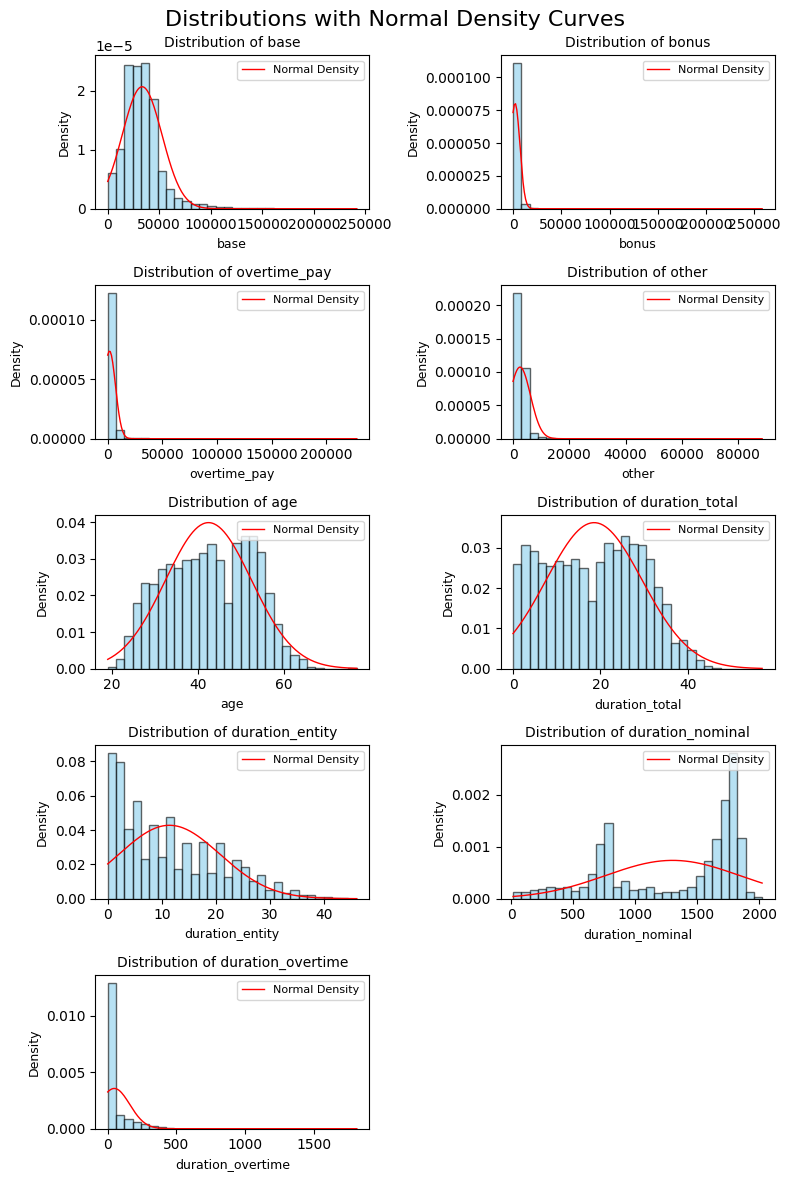

In [31]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

quantitative_vars_to_plot = [var for var in quantitative_vars if var != 'id']
num_vars = len(quantitative_vars_to_plot)
cols = 2
rows = int(np.ceil(num_vars / cols))

fig, axs = plt.subplots(rows, cols, figsize=(8, 12))
axs = axs.flatten()

for i, var in enumerate(quantitative_vars_to_plot):
    data = df[var]
    mu = data.mean()
    sigma = data.std()
    
    # Plot histogram (density normalized)
    axs[i].hist(data, bins=30, density=True, alpha=0.6, color='skyblue', edgecolor='black')
    
    # Compute values for the normal density curve overlay
    x_vals = np.linspace(data.min(), data.max(), 200)
    y_vals = norm.pdf(x_vals, mu, sigma)
    
    axs[i].plot(x_vals, y_vals, linewidth=1, color='red', label='Normal Density')
    axs[i].set_title(f"Distribution of {var}", fontsize=10)
    axs[i].set_xlabel(var, fontsize=9)
    axs[i].set_ylabel("Density", fontsize=9)
    axs[i].legend(loc='upper right', fontsize=8)

# Remove unused subplots if any
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.suptitle("Distributions with Normal Density Curves", fontsize=16)
plt.tight_layout()
plt.show()

### Task 2. Clustering

**Preparing data for clustering.** 
We have already checked that there is no missing data, so we do not need to worry about it. For clustering, I focus only on quantitative variables (I discard 'id' for obvious reasons), because qualitative variables do not have a numerical order that can be used in calculating the Euclidean distances needed to perform the K-means algorithm, which I want to use.


Let's check for strong correlations between variables to avoid over-representation. Below is the correlation matrix of the variables.

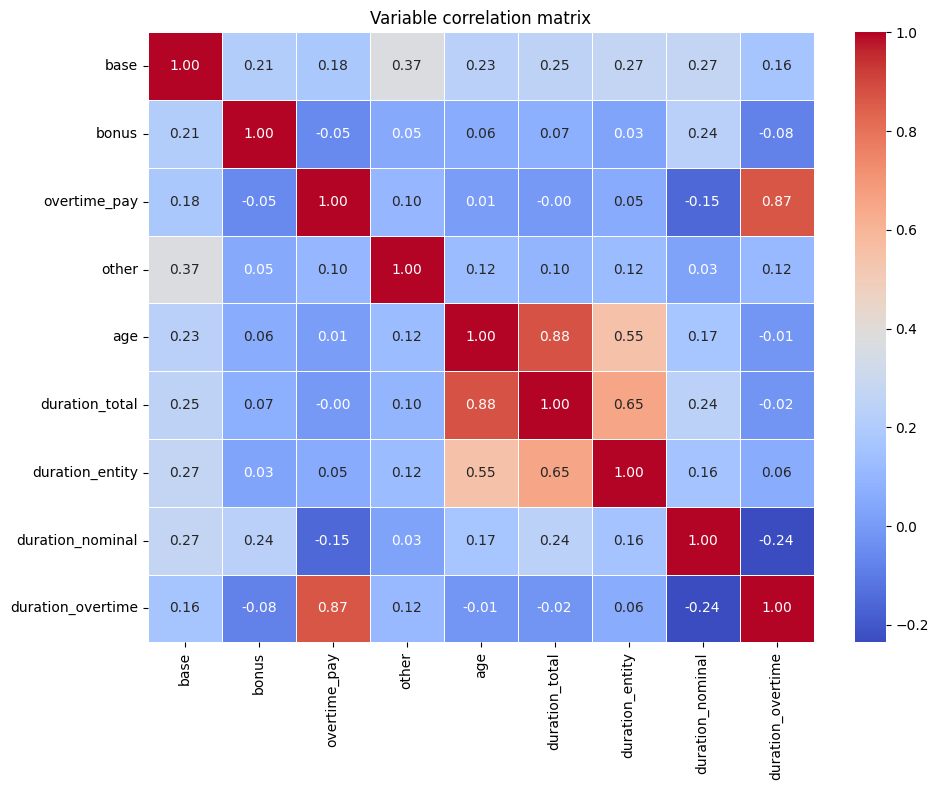

In [32]:
# Variable selection
features = [var for var in quantitative_vars if var != 'id']

# Check correlations between variables to avoid over-representation
correlation_matrix = df[features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Variable correlation matrix')
plt.tight_layout()
plt.show()

From the diagram, we can see that we have 2 pairs of highly correlated data: ('age', 'duration_total') and ('overtime_pay' and 'duration_overtime'). For this reason, after standarization we will use **PCA** to remove correlations and redact dimensionality.

To standarization I will use **StandarScaler()** because variables have different scales and StandardScaler() transforms each variable so that their mean = 0 and standard_deviation = 1. Without standardization, variables with larger absolute values (like base) would have a disproportionate impact on clustering results.

In [33]:
X = df[features].copy()

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=features)

# KMeans clustering
pca = PCA(n_components=0.95)  # zachowanie 95% wariancji
X_reduced = pca.fit_transform(X_scaled)

# Ready data to cluster
display(pd.DataFrame(X_reduced))

,0,1,2,3,4,5,6
0,0.596800,-0.863675,-0.907348,-0.384693,0.396145,-0.556316,-0.820271
1,-0.800859,-0.391731,0.913563,0.358437,0.532681,0.070173,-0.076558
2,1.210293,-0.953465,-0.920223,-0.223970,0.593268,-0.623174,0.420000
3,1.222815,-1.078613,-1.125727,-0.380794,0.496644,-1.236201,-0.382848
4,0.948883,0.373163,-1.130050,0.594760,-0.601338,0.410289,-0.061290
...,...,...,...,...,...,...,...
10995,1.431160,0.141625,-1.067017,0.572957,-0.739228,0.796343,0.569520
10996,0.253080,-0.823186,0.548912,-0.498032,0.092432,-0.231357,0.669227
10997,1.478474,0.268028,2.717295,2.036173,1.067460,0.975126,-2.259773
10998,2.019902,-0.608594,1.158100,0.034778,-0.086867,0.401607,0.267517


**Perform clustering with the K-means method.**

We run K-means for k ∈ [2, 11] and find the best silhouette score.
Results will be shown on the graph.

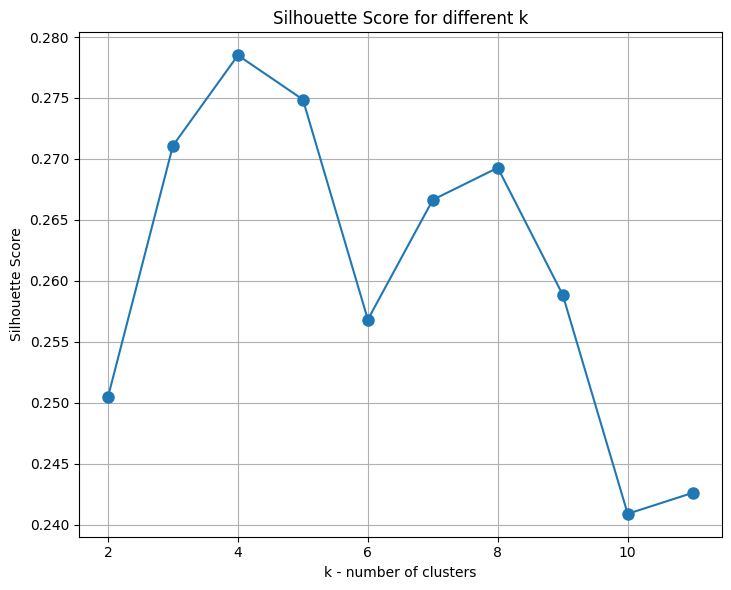

The best Silhouette Score for k = 4 and the score is 0.28.


In [34]:
silhouette_scores = []
k_range = range(2, 12)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_reduced)
    silhouette_scores.append(silhouette_score(X_reduced, kmeans.labels_))


plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, 'o-', markersize=8)
plt.xlabel('k - number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for different k')
plt.grid(True)

plt.tight_layout()
plt.show()

best_k = k_range[silhouette_scores.index(max(silhouette_scores))]
print(f"The best Silhouette Score for k = {best_k} and the score is {max(silhouette_scores):.2f}.")

In [35]:
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
kmeans.fit(X_reduced)

# Add cluster labels to the original DataFrame
df_clustered = df.copy()
df_clustered['cluster'] = kmeans.labels_

# Average values of variables in each cluster
cluster_stats = df_clustered.groupby('cluster')[features].mean().round(2)
print("Average values of variables in each cluster:")
display(cluster_stats)


cluster_counts = df_clustered['cluster'].value_counts().sort_index()
print("\nClusters' size:")
display(cluster_counts)



Average values of variables in each cluster:


,base,bonus,overtime_pay,other,age,duration_total,duration_entity,duration_nominal,duration_overtime
cluster,,,,,,,,,
0,80825.96,9186.94,678.18,10215.88,48.08,23.09,13.18,1689.75,13.37
1,25209.42,1550.36,623.16,1641.73,33.69,8.37,4.58,1160.59,21.89
2,33097.28,2082.13,472.77,1958.15,49.73,27.25,16.84,1487.55,15.44
3,41916.13,1060.41,10895.35,3929.04,43.25,19.43,14.07,890.65,288.78



Clusters' size:


cluster
0     576
1    4435
2    4791
3    1198
Name: count, dtype: int64

### Task 3. Classification



**Data preparing**

In [36]:
df['higher_education'] = df['education'] <= 2

qualitative_features = [var for var in qualitative_vars if var != 'education']
quantitative_features = [var for var in quantitative_vars if var != 'id']
features = qualitative_features + quantitative_features

X = df[features].copy()
X = pd.get_dummies(X, columns=qualitative_features, drop_first=True)
Y = df['higher_education'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train[quantitative_features] = scaler.fit_transform(X_train[quantitative_features])
X_test[quantitative_features] = scaler.transform(X_test[quantitative_features])

**Logisti Regression**

Accuracy of cross-validation for logistic regression: 0.8692 ± 0.0063

Logistic Regression model review:
Accuracy: 0.8661

Confusion matrix:
[[ 911  232]
 [ 210 1947]]

Raport:
              precision    recall  f1-score   support

       False       0.81      0.80      0.80      1143
        True       0.89      0.90      0.90      2157

    accuracy                           0.87      3300
   macro avg       0.85      0.85      0.85      3300
weighted avg       0.87      0.87      0.87      3300



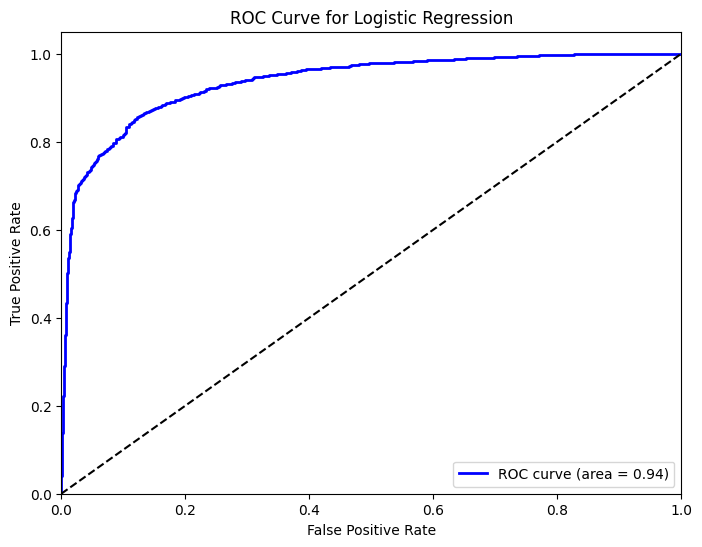

In [37]:
log_reg = LogisticRegression()

cv_scores_log = cross_val_score(log_reg, X_train, y_train, scoring='accuracy')

print(f"Accuracy of cross-validation for logistic regression: {cv_scores_log.mean():.4f} ± {cv_scores_log.std():.4f}")

# Model training
log_reg.fit(X_train, y_train)

y_pred_log = log_reg.predict(X_test)
y_prob_log = log_reg.predict_proba(X_test)[:, 1]

# Model review
print("\nLogistic Regression model review:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log):.4f}")
print("\nConfusion matrix:")
print(confusion_matrix(y_test, y_pred_log))
print("\nRaport:")
print(classification_report(y_test, y_pred_log))

# Krzywa ROC
fpr, tpr, _ = roc_curve(y_test, y_prob_log)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.show()



**LDA -  Linear Discriminant Analysis**

Accuracy of cross-validation for logistic regression: 0.8612 ± 0.0054

LDA model review:
Accuracy: 0.8600

Confusion matrix:
[[ 924  219]
 [ 243 1914]]

Raport:
              precision    recall  f1-score   support

       False       0.79      0.81      0.80      1143
        True       0.90      0.89      0.89      2157

    accuracy                           0.86      3300
   macro avg       0.84      0.85      0.85      3300
weighted avg       0.86      0.86      0.86      3300



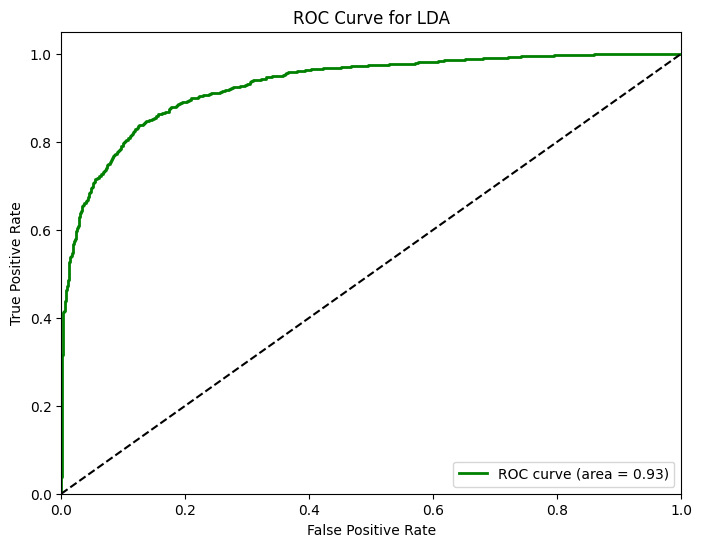

In [38]:
lda = LinearDiscriminantAnalysis()

cv_scores_lda = cross_val_score(lda, X_train, y_train, scoring='accuracy')

print(f"Accuracy of cross-validation for logistic regression: {cv_scores_lda.mean():.4f} ± {cv_scores_lda.std():.4f}")

# Model training
lda.fit(X_train, y_train)

y_pred_lda = lda.predict(X_test)
y_prob_lda = lda.predict_proba(X_test)[:, 1]

# Model review
print("\nLDA model review:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lda):.4f}")
print("\nConfusion matrix:")
print(confusion_matrix(y_test, y_pred_lda))
print("\nRaport:")
print(classification_report(y_test, y_pred_lda))

# Krzywa ROC
fpr_lda, tpr_lda, _ = roc_curve(y_test, y_prob_lda)
roc_auc_lda = auc(fpr_lda, tpr_lda)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lda, tpr_lda, color='green', lw=2, label=f'ROC curve (area = {roc_auc_lda:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for LDA')
plt.legend(loc="lower right")
plt.show()


**Comparmission**

In [39]:
# Porównanie wyników obu modeli
models = ['Logistic Regression', 'LDA -  Linear Discriminant Analysis']
cv_accuracies = [cv_scores_log.mean(), cv_scores_lda.mean()]
test_accuracies = [accuracy_score(y_test, y_pred_log), accuracy_score(y_test, y_pred_lda)]
roc_aucs = [roc_auc, roc_auc_lda]

comparison = pd.DataFrame({
    'Model': models,
    'CV Accuracy': cv_accuracies,
    'Accuracy on the test set': test_accuracies,
    'AUC ROC': roc_aucs
})
display(comparison)

,Model,CV Accuracy,Accuracy on the test set,AUC ROC
0,Logistic Regression,0.869221,0.866061,0.937237
1,LDA - Linear Discriminant Analysis,0.861169,0.860000,0.929392


**Results**

Looks like the **Logical Regression** method is a little bit better than **LDA**. Our classification model achieves an accuracy of 0.87 and an AUC (Area Under the Curve) of 0.94, which indicates the model's good ability to classify correctly.

**Importance of different variables in both models**

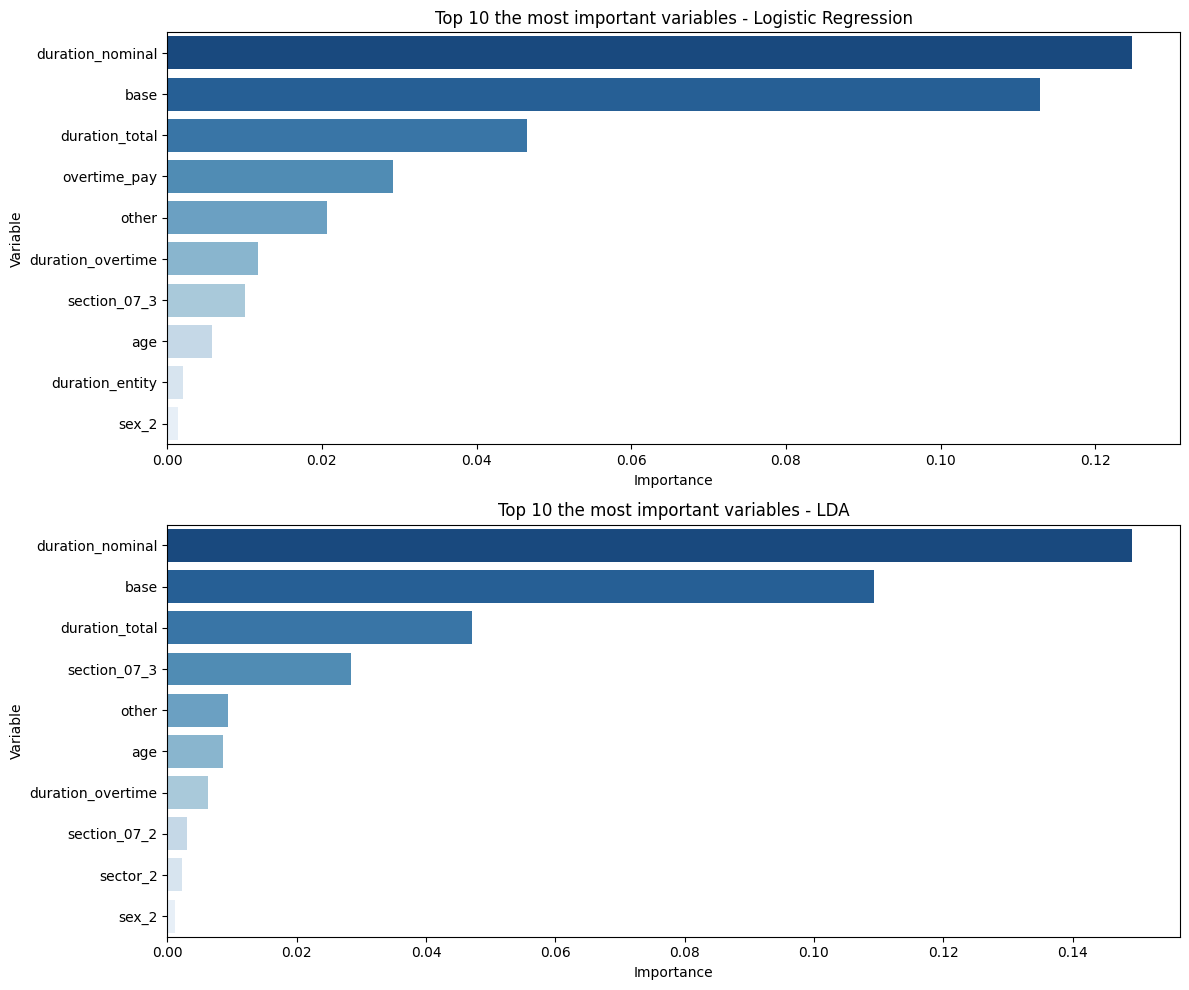

In [40]:
result_log = permutation_importance(log_reg, X_test, y_test, n_repeats=10, random_state=42)
log_reg_importance = pd.DataFrame({
    'Variable': X_train.columns,
    'Importance': result_log.importances_mean,
})
log_reg_importance = log_reg_importance.sort_values('Importance', ascending=False)

result_lda = permutation_importance(lda, X_test, y_test, n_repeats=10, random_state=42)
lda_importance = pd.DataFrame({
    'Variable': X_train.columns,
    'Importance': result_lda.importances_mean,
})
lda_importance = lda_importance.sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 10))

plt.subplot(2, 1, 1)
sns.barplot(x='Importance', y='Variable', data=log_reg_importance.head(10), hue='Variable', palette='Blues_r')
plt.title('Top 10 the most important variables - Logistic Regression')
plt.xlabel('Importance')
plt.ylabel('Variable')

plt.subplot(2, 1, 2)
sns.barplot(x='Importance', y='Variable', data=lda_importance.head(10), hue='Variable', palette='Blues_r')
plt.title('Top 10 the most important variables - LDA')
plt.xlabel('Importance')
plt.ylabel('Variable')

plt.tight_layout()
plt.show()


Logistic regression and LDA assess the significance of variables in a similar way, confirming the stability of the results. In both models, the most important variables are related to worked hours and base salary.

### Task 4. Regression

Preparing data. 

In [41]:
qualitative_features = qualitative_vars.copy()
quantitative_features = [var for var in quantitative_vars if var != 'id' and var != 'base']
features = qualitative_features + quantitative_features

X = df[features].copy()
# Convert qualitative variables to dummy variables
X = pd.get_dummies(X, columns=qualitative_features, dtype=int, drop_first=True)
Y = df['base'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
X_train = sm.add_constant(X_train)

Let's try to build model without eliminating unnecessary variables.

In [42]:
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   base   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     432.4
Date:                Fri, 09 May 2025   Prob (F-statistic):               0.00
Time:                        01:24:10   Log-Likelihood:                -84256.
No. Observations:                7700   AIC:                         1.685e+05
Df Residuals:                    7681   BIC:                         1.687e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.552e+04   1673.66

We can see that two variables: 'sector_02' and 'section_07_3' have high p_vales (over 0.05), so they are statistically insignificant. The higher the p-value, the more likely it is that the variable has no significant effect on the model. 

I will delete unnecessery variables using backward search.

In [43]:
def backward_elimination(X, y, significance_level=0.05):
    features = list(X.columns)
    while features:
        X_with_const = sm.add_constant(X[features])
        model = sm.OLS(y, X_with_const).fit()
        p_values = model.pvalues[1:]  # skip
        max_p_value = p_values.max()
        
        if max_p_value > significance_level:
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
            print(f"Removed: {excluded_feature} (p-value: {max_p_value:.4f})")
        else:
            break
            
    return features

selected_features = backward_elimination(X_train.drop('const', axis=1), y_train)
print(f"\nSelected features: {selected_features}")


Removed: sector_2 (p-value: 0.8144)
Removed: section_07_3 (p-value: 0.1204)

Selected features: ['bonus', 'overtime_pay', 'other', 'age', 'duration_total', 'duration_entity', 'duration_nominal', 'duration_overtime', 'section_07_2', 'sex_2', 'education_2', 'education_3', 'education_4', 'education_5', 'education_6', 'contract_2']


Now we can use the selected features to build a new model.

In [44]:
X_train = X_train[selected_features]
X_test = X_test[selected_features]
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   base   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     486.2
Date:                Fri, 09 May 2025   Prob (F-statistic):               0.00
Time:                        01:24:10   Log-Likelihood:                -84257.
No. Observations:                7700   AIC:                         1.685e+05
Df Residuals:                    7683   BIC:                         1.687e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.493e+04   1630.37

**Role of model's variables**

In [45]:
coefficients = pd.DataFrame({
    'Variable': model.params.index,
    'Coefficient': model.params.values,
    'Std Error': model.bse.values,
    'p-value': model.pvalues.values
})
coefficients['Absolute Value'] = abs(coefficients['Coefficient'])
coefficients_sorted = coefficients.sort_values('Absolute Value', ascending=False)
display(coefficients_sorted)

,Variable,Coefficient,Std Error,p-value,Absolute Value
15,education_6,-29657.385551,1237.504302,1.826302e-122,29657.385551
14,education_5,-28216.974610,1054.132198,5.437890e-151,28216.974610
13,education_4,-20882.227723,984.821752,5.066848e-97,20882.227723
12,education_3,-17966.523018,1118.513507,3.931026e-57,17966.523018
0,const,14929.847391,1630.377703,6.714809e-20,14929.847391
9,section_07_2,-6660.086252,404.041717,5.115243e-60,6660.086252
16,contract_2,-5537.748070,491.032214,2.867419e-29,5537.748070
11,education_2,-4192.165488,894.677020,2.838400e-06,4192.165488
10,sex_2,-2032.794008,372.795161,5.111070e-08,2032.794008
4,age,278.967447,33.874965,2.089082e-16,278.967447


Based on the coefficients of the regression model, we can draw the following conclusions about the impact of individual variables on basic salary (base):

1. **Quantitative variables:**.
   - **other** - the variable with the highest positive coefficient among quantitative variables. It indicates that additional pay (other) is strongly related to higher base pay. For each unit of “other,” base salary increases on average by the value of the coefficient, while controlling for other variables.
   - **bonus** - positive effect on base salary. Employees with higher bonuses tend to have higher base salaries as well.
   - **duration_nominal** - the number of nominal hours has a positive effect on base pay, which is logical, since more hours often translates into higher pay.
   - **overtime_pay** - positively related to base pay, those with higher overtime pay tend to have higher base pay.
   - **age** - employee's age has a positive effect on base salary, suggesting that older employees are paid more, possibly due to more experience.
   - **duration_total** and **duration_entity** - total length of service and length of service in the current company can affect base salary, but their significance is less compared to other variables.

2. **Qualitative (categorical) variables:**.
   - **Sector and Industry (sector, section_07)** - different categories of sectors and industries have different effects on basic salary. For example, the private sector (sector_1) may have a different impact than the public sector.
   - **Gender (sex)** - gender can have an impact on base salary, which may indicate a gender pay gap.
   - **Education (education)** - education level has a significant impact on basic salary. The higher the education, the higher the basic salary.
   - **Type of contract (contract)** - the type of employment contract also affects the basic salary.

**Summary**

The model shows that the basic (base) salary is determined by a combination of both quantitative and qualitative factors. The most important factors are additional wages (other), bonuses (bonus), nominal working time, and education and sector of employment. These variables explain a significant portion of the variance in base salary.